In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DataFrame penjualan bulanan smartphone (unit) tahun 2025
df = pd.DataFrame({
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'zt': [210, 225, 198, 240, 215, 180, 205, 250, 195, 230, 200, 245]
})

df

,t,zt
0,1,210
1,2,225
2,3,198
3,4,240
4,5,215
5,6,180
6,7,205
7,8,250
8,9,195
9,10,230


In [20]:
zbar = df['zt'].mean()
df['z̄']= zbar
df['z̄t']=df['zt'] - df['z̄']
df['z̄t+1']=df['z̄t'].shift(-1)
df

,t,zt,z̄,z̄t,z̄t+1
0,2025-01-01,210,216.083333,-6.083333,8.916667
1,2025-02-01,225,216.083333,8.916667,-18.083333
2,2025-03-01,198,216.083333,-18.083333,23.916667
3,2025-04-01,240,216.083333,23.916667,-1.083333
4,2025-05-01,215,216.083333,-1.083333,-36.083333
5,2025-06-01,180,216.083333,-36.083333,-11.083333
6,2025-07-01,205,216.083333,-11.083333,33.916667
7,2025-08-01,250,216.083333,33.916667,-21.083333
8,2025-09-01,195,216.083333,-21.083333,13.916667
9,2025-10-01,230,216.083333,13.916667,-16.083333


In [3]:
# Convert 't' (1..12) to monthly datetimes in 2025 without specifying a day
df['t'] = pd.to_datetime('2025-' + df['t'].astype(str).str.zfill(2), format='%Y-%m')
df

,t,zt
0,2025-01-01,210
1,2025-02-01,225
2,2025-03-01,198
3,2025-04-01,240
4,2025-05-01,215
5,2025-06-01,180
6,2025-07-01,205
7,2025-08-01,250
8,2025-09-01,195
9,2025-10-01,230


Text(0.5, 1.0, 'Lag Plot of Demeaned Smartphone Sales')

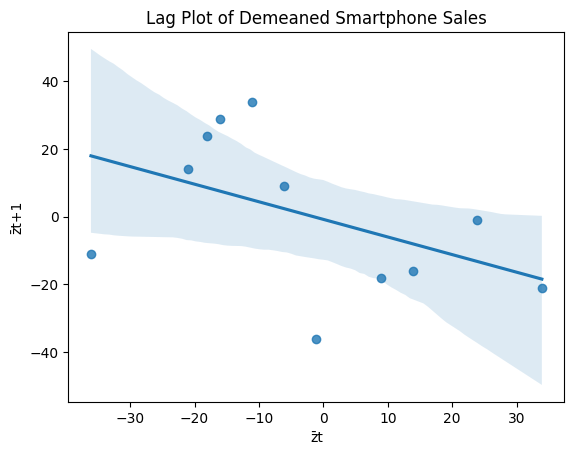

In [24]:
sns.regplot(data=df, x='z̄t', y='z̄t+1', marker='o')
plt.title('Lag Plot of Demeaned Smartphone Sales')  

Text(0.5, 1.0, 'Monthly Smartphone Sales in 2025')

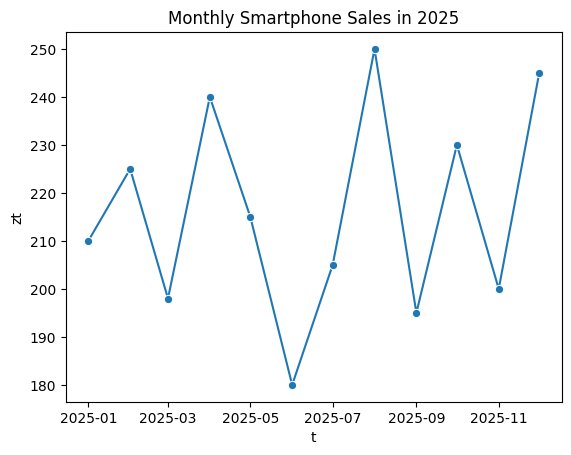

In [4]:
sns.lineplot(data=df, x='t', y='zt', marker='o')
plt.title('Monthly Smartphone Sales in 2025')

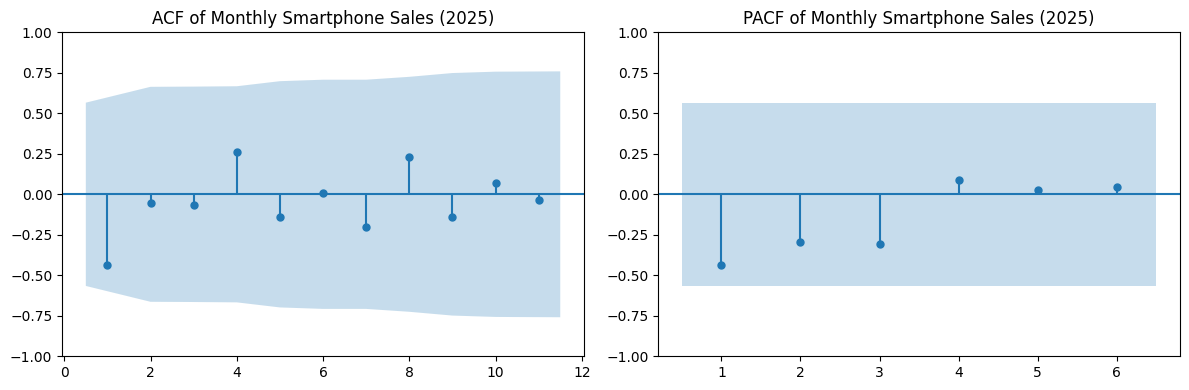

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df.sort_values('t')['zt']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].cla()
plot_acf(series, lags=min(len(series) - 1, K), zero=False, ax=axes[0])
axes[0].set_title('ACF of Monthly Smartphone Sales (2025)')

axes[1].cla()
plot_pacf(series, lags=min(len(series) - 1, lags), method='ywm', zero=False, ax=axes[1])
axes[1].set_title('PACF of Monthly Smartphone Sales (2025)')
plt.tight_layout()

In [14]:
series

0     210
1     225
2     198
3     240
4     215
5     180
6     205
7     250
8     195
9     230
10    200
11    245
Name: zt, dtype: int64

In [18]:
from statsmodels.tsa.stattools import acf as sm_acf, pacf_yw

# Use the same lag setting as the plots (0..6)
lags = min(len(series) - 1, 6)

# Compute ACF and PACF values
acf_vals = sm_acf(series, nlags=11, fft=False)
pacf_vals = pacf_yw(series, nlags=lags, method='mle')  # matches plot_pacf(method='ywm')

# Extend PACF to lags 0..11 with NaN for lags 7..11 and rebuild the DataFrame
pacf_full = np.full(len(acf_vals), np.nan, dtype=float)
pacf_full[:len(pacf_vals)] = pacf_vals

acf_pacf_df = pd.DataFrame({
    'lag': np.arange(len(acf_vals)),
    'acf': acf_vals,
    'pacf': pacf_full
})
acf_pacf_df

,lag,acf,pacf
0,0,1.000000,1.000000
1,1,-0.433467,-0.433467
2,2,-0.053478,-0.297216
3,3,-0.066312,-0.304194
4,4,0.258434,0.086703
5,5,-0.141245,0.024901
6,6,0.010884,0.047410
7,7,-0.199433,NaN
8,8,0.231887,NaN
9,9,-0.141031,NaN


In [32]:
# Add t-statistics for ACF and PACF (approx t = value * sqrt(n), for lags > 0)
n = len(series)
sqrt_n = np.sqrt(n)
mask0 = acf_pacf_df['lag'] == 0

acf_pacf_df['acf_t'] = acf_pacf_df['acf'] * sqrt_n
acf_pacf_df.loc[mask0, 'acf_t'] = np.nan

acf_pacf_df['pacf_t'] = acf_pacf_df['pacf'] * sqrt_n
acf_pacf_df.loc[mask0, 'pacf_t'] = np.nan

acf_pacf_df

,lag,acf,pacf,acf_t,pacf_t
0,0,1.000000,1.000000,NaN,NaN
1,1,-0.433467,-0.433467,-1.501572,-1.501572
2,2,-0.053478,-0.297216,-0.185252,-1.029586
3,3,-0.066312,-0.304194,-0.229710,-1.053759
4,4,0.258434,0.086703,0.895241,0.300347
5,5,-0.141245,0.024901,-0.489287,0.086259
6,6,0.010884,0.047410,0.037705,0.164232
7,7,-0.199433,NaN,-0.690857,NaN
8,8,0.231887,NaN,0.803279,NaN
9,9,-0.141031,NaN,-0.488546,NaN


In [38]:
sr1=1*(len(series)**(-1/2)) # standard error
t_r1= acf_pacf_df.loc[1, 'acf'] / sr1
t_r1

-1.5015724066295266

In [39]:
sr2=(1+2*(acf_pacf_df.loc[1,'acf']**2))**0.5 * (len(series)**(-1/2)) # standard error
t_r2= acf_pacf_df.loc[2, 'acf'] / sr2
t_r2

-0.1579381994847326

In [40]:
# Fix acf_t using: se_k = sqrt((1 + 2 * sum_{j=1}^{k-1} r_j^2) / n),  t_k = r_k / se_k  for k >= 1
r = acf_pacf_df['acf'].to_numpy()
K = len(r) - 1

cum_sq = np.cumsum(r[1:]**2)                      # r1^2, r2^2, ...
S = np.concatenate(([0.0], cum_sq[:-1])) if K > 0 else np.array([], dtype=float)  # sum_{j=1}^{k-1} r_j^2

acf_se = np.full(len(r), np.nan, dtype=float)
if K > 0:
    acf_se[1:] = np.sqrt((1.0 + 2.0 * S) / n)

acf_t_fixed = np.full(len(r), np.nan, dtype=float)
if K > 0:
    acf_t_fixed[1:] = r[1:] / acf_se[1:]

acf_pacf_df['acf_se'] = acf_se
acf_pacf_df['acf_t'] = acf_t_fixed

acf_pacf_df

,lag,acf,pacf,acf_t,pacf_t,acf_se
0,0,1.000000,1.000000,NaN,NaN,NaN
1,1,-0.433467,-0.433467,-1.501572,-1.501572,0.288675
2,2,-0.053478,-0.297216,-0.157938,-1.029586,0.338598
3,3,-0.066312,-0.304194,-0.195436,-1.053759,0.339302
4,4,0.258434,0.086703,0.759252,0.300347,0.340380
5,5,-0.141245,0.024901,-0.396359,0.086259,0.356356
6,6,0.010884,0.047410,0.030151,0.164232,0.360991
7,7,-0.199433,NaN,-0.552418,NaN,0.361019
8,8,0.231887,NaN,0.626576,NaN,0.370086
9,9,-0.141031,NaN,-0.369190,NaN,0.382002


In [41]:
# Fix pacf_t using se(phi_k) ≈ 1/sqrt(n) for k ≥ 1 (white-noise null)
sqrt_n = np.sqrt(n)
se_const = 1.0 / sqrt_n  # sqrt_n already available

mask = (acf_pacf_df['lag'] > 0) & acf_pacf_df['pacf'].notna()

pacf_se = np.full(len(acf_pacf_df), np.nan, dtype=float)
pacf_se[mask] = se_const

pacf_t_fixed = np.full(len(acf_pacf_df), np.nan, dtype=float)
pacf_t_fixed[mask] = acf_pacf_df.loc[mask, 'pacf'].to_numpy() / se_const

acf_pacf_df['pacf_se'] = pacf_se
acf_pacf_df['pacf_t'] = pacf_t_fixed

acf_pacf_df

,lag,acf,pacf,acf_t,pacf_t,acf_se,pacf_se
0,0,1.000000,1.000000,NaN,NaN,NaN,NaN
1,1,-0.433467,-0.433467,-1.501572,-1.501572,0.288675,0.288675
2,2,-0.053478,-0.297216,-0.157938,-1.029586,0.338598,0.288675
3,3,-0.066312,-0.304194,-0.195436,-1.053759,0.339302,0.288675
4,4,0.258434,0.086703,0.759252,0.300347,0.340380,0.288675
5,5,-0.141245,0.024901,-0.396359,0.086259,0.356356,0.288675
6,6,0.010884,0.047410,0.030151,0.164232,0.360991,0.288675
7,7,-0.199433,NaN,-0.552418,NaN,0.361019,NaN
8,8,0.231887,NaN,0.626576,NaN,0.370086,NaN
9,9,-0.141031,NaN,-0.369190,NaN,0.382002,NaN


# CALCULATION OF ACF

In [27]:
df['z̄t*z̄t+1']=df['z̄t'] * df['z̄t+1']
df['z̄t^2']=df['z̄t'] **2
df

,t,zt,z̄,z̄t,z̄t+1,z̄t + z̄t+1,z̄t^2,z̄t*z̄t+1
0,2025-01-01,210,216.083333,-6.083333,8.916667,2.833333,37.006944,-54.243056
1,2025-02-01,225,216.083333,8.916667,-18.083333,-9.166667,79.506944,-161.243056
2,2025-03-01,198,216.083333,-18.083333,23.916667,5.833333,327.006944,-432.493056
3,2025-04-01,240,216.083333,23.916667,-1.083333,22.833333,572.006944,-25.909722
4,2025-05-01,215,216.083333,-1.083333,-36.083333,-37.166667,1.173611,39.090278
5,2025-06-01,180,216.083333,-36.083333,-11.083333,-47.166667,1302.006944,399.923611
6,2025-07-01,205,216.083333,-11.083333,33.916667,22.833333,122.840278,-375.909722
7,2025-08-01,250,216.083333,33.916667,-21.083333,12.833333,1150.340278,-715.076389
8,2025-09-01,195,216.083333,-21.083333,13.916667,-7.166667,444.506944,-293.409722
9,2025-10-01,230,216.083333,13.916667,-16.083333,-2.166667,193.673611,-223.826389


In [28]:
r1 = df['z̄t*z̄t+1'].sum() / df['z̄t^2'].sum()
r1

-0.4334666165876358

In [31]:
df['z̄t^2'].sum()

5324.916666666666